# Estadística básica

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #para poner histogramas juntos

In [70]:
def chr_int(a):
    """ Si es un número, lo devuelve. Si no devuelve -1 """
    if a.strip().isdigit():
        return int(a)
    else:
        return 0


file = open('adult.data', 'r')  # apertura del fichero

datos = []  # Base de datos
n = 0  # recuento de datos
for i in file:  # por cada fila del fichero de datos
    fila = i.split(",")  # divide en trozo las filas
    for j in range(0, len(fila)):
        fila[j] = fila[j].strip()  # necesario limpiar caracteres espacios en blanco o saltos de línea.
    try:
        datos.append([chr_int(fila[0]),
                      fila[1],
                      chr_int(fila[2]),
                      fila[3],
                      chr_int(fila[4]),
                      fila[5], fila[6], fila[7], fila[8], fila[9],
                      chr_int(fila[10]), chr_int(fila[11]), chr_int(fila[12]),
                      fila[13], fila[14]])
    except IndexError as e:
        print("Fin de fichero")

# En pantalla algunos datos.
for algunos in datos[0:10]:
    print(algunos)

Fin de fichero
[39, 'State-gov', 77516, 'Bachelors', 13, 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 2174, 0, 40, 'United-States', '<=50K']
[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K']
[38, 'Private', 215646, 'HS-grad', 9, 'Divorced', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States', '<=50K']
[53, 'Private', 234721, '11th', 7, 'Married-civ-spouse', 'Handlers-cleaners', 'Husband', 'Black', 'Male', 0, 0, 40, 'United-States', '<=50K']
[28, 'Private', 338409, 'Bachelors', 13, 'Married-civ-spouse', 'Prof-specialty', 'Wife', 'Black', 'Female', 0, 0, 40, 'Cuba', '<=50K']
[37, 'Private', 284582, 'Masters', 14, 'Married-civ-spouse', 'Exec-managerial', 'Wife', 'White', 'Female', 0, 0, 40, 'United-States', '<=50K']
[49, 'Private', 160187, '9th', 5, 'Married-spouse-absent', 'Other-service', 'Not-in-family', 'Black', 'Female', 0, 0, 16, 

## Construcción de los dataframes

In [71]:
# Se construye un dataframe en pandas
df = pd.DataFrame(datos)
# datos es una lista de listas, cada una con un registro. En el programa se han quitado espacios a cada
# dato leído del fichero, se han convertido en enteros los que eran números.
df.columns = ['edad', 'tipo de empleado', 'fnlwgt', 'educación', 'educación_n', 'estado civil', 'ocupación', 'relación',
              'carrera', 'sexo', 'ganancias', 'pérdidas', 'horas semana', 'país', 'ingresos']


### Agrupaciones

In [72]:
print(df.shape)
contar = df.groupby('país').size()  # agrupo por países, y calculo cuántas filas hay por cada país
print(contar.head())  # muestro las cinco primeras.

(32561, 15)
país
?           583
Cambodia     19
Canada      121
China        75
Columbia     59
dtype: int64


### Sub dataframes

In [73]:
# separamos los data frames por sexo, y por sexo y por nivel de ingresos
mdf = df[df['sexo'] == 'Male']
wdf = df[df['sexo'] == 'Female']
mdf1 = df[(df['sexo'] == 'Male') & (df['ingresos'] == '>50K')]
wdf1 = df[(df.sexo == 'Female') & (df.ingresos == '>50K')]
print(mdf.head(), wdf.head())

   edad  tipo de empleado  fnlwgt  educación  educación_n        estado civil  \
0    39         State-gov   77516  Bachelors           13       Never-married   
1    50  Self-emp-not-inc   83311  Bachelors           13  Married-civ-spouse   
2    38           Private  215646    HS-grad            9            Divorced   
3    53           Private  234721       11th            7  Married-civ-spouse   
7    52  Self-emp-not-inc  209642    HS-grad            9  Married-civ-spouse   

           ocupación       relación carrera  sexo  ganancias  pérdidas  \
0       Adm-clerical  Not-in-family   White  Male       2174         0   
1    Exec-managerial        Husband   White  Male          0         0   
2  Handlers-cleaners  Not-in-family   White  Male          0         0   
3  Handlers-cleaners        Husband   Black  Male          0         0   
7    Exec-managerial        Husband   White  Male          0         0   

   horas semana           país ingresos  
0            40  United-St

### Medias, desviación típica, medianas, varianzas

In [74]:
# Porcentajes. Pág 33. varias formas de verlo.
print("Porcentaje de hombres ({}) en datos ({}): {}%"
      .format(df.shape[0], mdf.shape[0], int(10000 * mdf.shape[0] / df.shape[0]) / 100))
print("Porcentaje de mujeres ({}) en datos ({}): {}%"
      .format(len(wdf), len(df), 10000 * len(wdf) / float(len(df) * 100)))
print("Porcentaje de mujeres con altas ganancias ({}) en datos ({}): {}%"
      .format(len(wdf1), len(df), 10000 * len(wdf1) / float(len(df) * 100)))
print("Porcentaje de hombres con altas ganancias ({}) en datos ({}): {}%"
      .format(len(mdf1), len(df), 10000 * len(mdf1) / float(len(df) * 100)))

# Medias. Pág 34
print("Media de las edades en el dataframe datos: {}".format(df['edad'].mean()))
print("Media de las edades de los hombres: {}".format(mdf['edad'].mean()))
print("Media de las edades de las mujeres: {}".format(wdf['edad'].mean()))
print("Media de las edades de los hombres con altas ganancias: {}".format(mdf1['edad'].mean()))
print("Media de las edades de las mujeres con altas ganancias: {}".format(wdf1['edad'].mean()))

# Varianzas y desviaciones típicas.
print("Media {}, Varianza {} y desviación típica {} de la edad en datos"
      .format(df['edad'].mean(), df['edad'].var(), df['edad'].std()))
print("Media {}, Varianza {} y desviación típica {} de la edad en hombres"
      .format(mdf['edad'].mean(), mdf['edad'].var(), mdf['edad'].std()))
print("Media {}, Varianza {} y desviación típica {} de la edad en mujeres"
      .format(wdf['edad'].mean(), wdf['edad'].var(), wdf['edad'].std()))
print("Media {}, Varianza {} y desviación típica {} de la edad en hombres con altas ganancias"
      .format(mdf1['edad'].mean(), mdf1['edad'].var(), mdf1['edad'].std()))
print("Media {}, Varianza {} y desviación típica {} de la edad en mujeres con altas ganancias"
      .format(wdf1['edad'].mean(), wdf1['edad'].var(), wdf1['edad'].std()))

# Medianas de las edades de los dataframes considerados.
print("Mediana de las edades en el dataframe datos: {}".format(df['edad'].median()))
print("Mediana de las edades de los hombres: {}".format(mdf['edad'].median()))
print("Mediana de las edades de las mujeres: {}".format(wdf['edad'].median()))
print("Mediana de las edades de los hombres con altas ganancias: {}".format(mdf1['edad'].median()))
print("Mediana de las edades de las mujeres con altas ganancias: {}".format(wdf1['edad'].median()))

# Cuartiles de los datos.
print("Resumen de datos estadísticos {}".format(df['edad'].describe()))

Porcentaje de hombres (32561) en datos (21790): 66.92%
Porcentaje de mujeres (10771) en datos (32561): 33.07945087681582%
Porcentaje de mujeres con altas ganancias (1179) en datos (32561): 3.6208961641227235%
Porcentaje de hombres con altas ganancias (6662) en datos (32561): 20.460059580479715%
Media de las edades en el dataframe datos: 38.58164675532078
Media de las edades de los hombres: 39.43354749885268
Media de las edades de las mujeres: 36.85823043357163
Media de las edades de los hombres con altas ganancias: 44.62578805163614
Media de las edades de las mujeres con altas ganancias: 42.125530110262936
Media 38.58164675532078, Varianza 186.06140024879625 y desviación típica 13.640432553581146 de la edad en datos
Media 39.43354749885268, Varianza 178.77375174530096 y desviación típica 13.37063019252649 de la edad en hombres
Media 36.85823043357163, Varianza 196.3837063948037 y desviación típica 14.01369709943824 de la edad en mujeres
Media 44.62578805163614, Varianza 109.94506674864

### Histogramas

<Axes: >

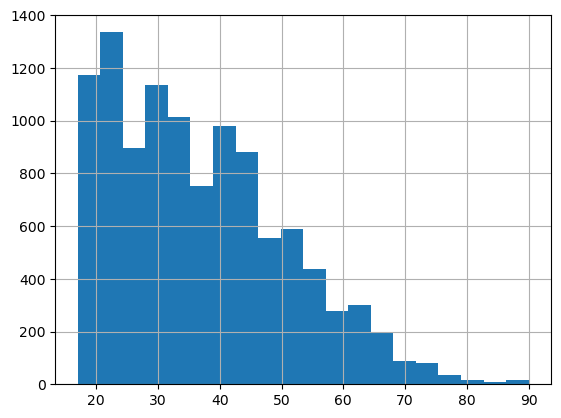

In [75]:
wdf['edad'].hist(density=False,histtype="stepfilled", bins=20)

<Axes: >

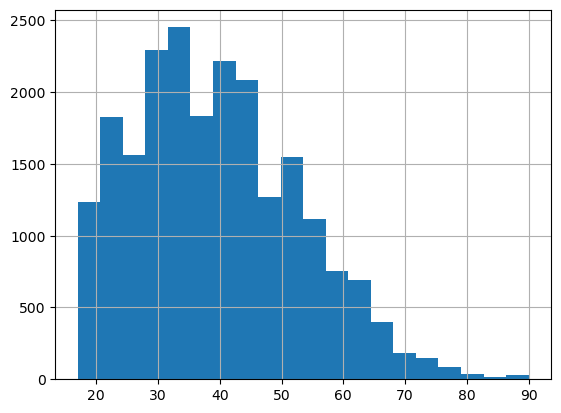

In [76]:
mdf['edad'].hist(density=False,histtype="stepfilled", bins=20)

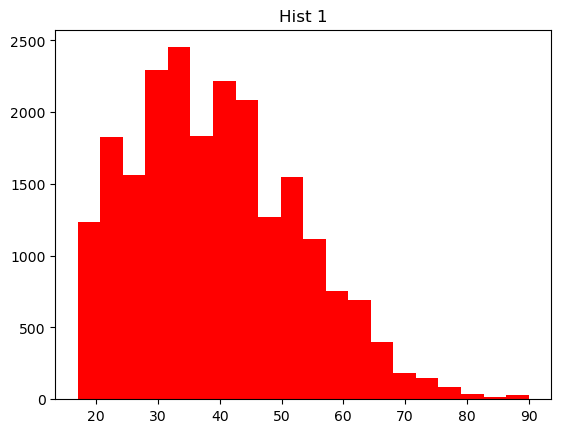

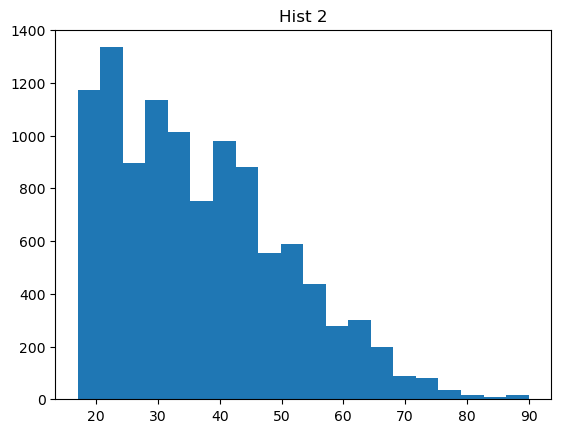

In [77]:
# Histograma
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.hist(mdf['edad'],density=False,histtype="stepfilled", bins=20,color="r")
ax1.set_title("Hist 1")
ax2.hist(wdf['edad'],density=False,histtype="stepfilled", bins=20)
ax2.set_title("Hist 2")

plt.show()

<Axes: >

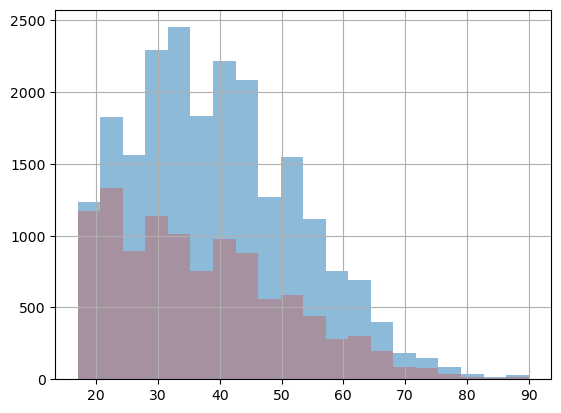

In [78]:

mdf['edad'].hist(density=False,histtype="stepfilled", bins=20,alpha=0.5)
wdf['edad'].hist(density=False,histtype="stepfilled", bins=20,alpha=0.5, color=sns.desaturate('indianred',0.75))

### CDF
Cumulative Distribution Function. Función de distribución acumulativa. Representa la probabilidad de que una variable cualquiera X **valga menos o igual que x**

<Axes: >

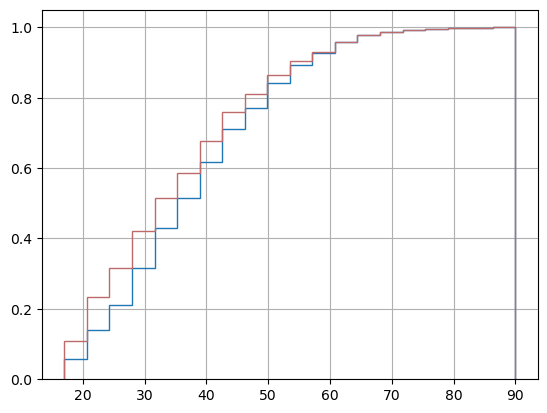

In [82]:
mdf['edad'].hist(density=True,histtype="step", bins=20,cumulative=True)
wdf['edad'].hist(density=True,histtype="step", bins=20,cumulative=True, color=sns.desaturate('indianred',0.75))